<a href="https://colab.research.google.com/github/saurabhsingh1411/av_computervision_game_of_thrones/blob/main/AV_computer_vision_gameofthrones_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing file and lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import os 
import zipfile

In [2]:
zip_ref=zipfile.ZipFile('train.zip')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
train_dir='/tmp/images'
train_fnames=os.listdir(train_dir)
print(train_fnames[:10])
print('total training images:',len(os.listdir(train_dir)))

['2884349.jpg', '2853886.jpg', '2890418.jpg', '2835369.jpg', '2849907.jpg', '2833328.jpg', '2840924.jpg', '1533033.jpg', '622359.jpg', '2788239.jpg']
total training images: 8932


In [5]:
train_data=pd.read_csv('/tmp/train.csv',dtype=str)
train_data.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [6]:
train_data.count()

image       6252
category    6252
dtype: int64

In [8]:
test_data=pd.read_csv('test.csv')
test_data.head()

,image
0,1007700.jpg
1,1011369.jpg
2,1051155.jpg
3,1062001.jpg
4,1069397.jpg


In [9]:
test_data.count()

image    2680
dtype: int64

In [10]:
sample_sub=pd.read_csv('ss.csv')
sample_sub.head()

,image,category
0,1007700.jpg,1
1,1011369.jpg,1
2,1051155.jpg,1
3,1062001.jpg,1
4,1069397.jpg,1


In [11]:
sample_sub.count()

image       2680
category    2680
dtype: int64

## Build Model

In [12]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # RGB color

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

Callbacks


In [16]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

Early Stop

In [17]:
earlystop = EarlyStopping(patience=10)

Learning Rate Reduction


In [18]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [19]:
callbacks = [earlystop, learning_rate_reduction]

Prepare Validate and Train Data¶

In [20]:
train_df, validate_df = train_test_split(train_data, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
test_df = test_data.reset_index(drop=True)

In [21]:
train_df['category'].value_counts()

1    1702
5     961
2     941
3     732
4     665
Name: category, dtype: int64

In [24]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [26]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df, 
    directory="/tmp/images/", 
    x_col='image',
    y_col="category",
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5001 validated image filenames belonging to 5 classes.


In [27]:
#validation_datagen = ImageDataGenerator(rescale=1./255)
#validation_generator = validation_datagen.flow_from_dataframe(
 #   validate_df, 
 #   "../input/data/data/images/", 
 #   x_col='image',
 #   y_col='category',
 #   target_size=IMAGE_SIZE,
  #  class_mode='categorical',
  #  batch_size=batch_size
#)

See how our generator work

In [28]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/tmp/images/", 
    x_col='image',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


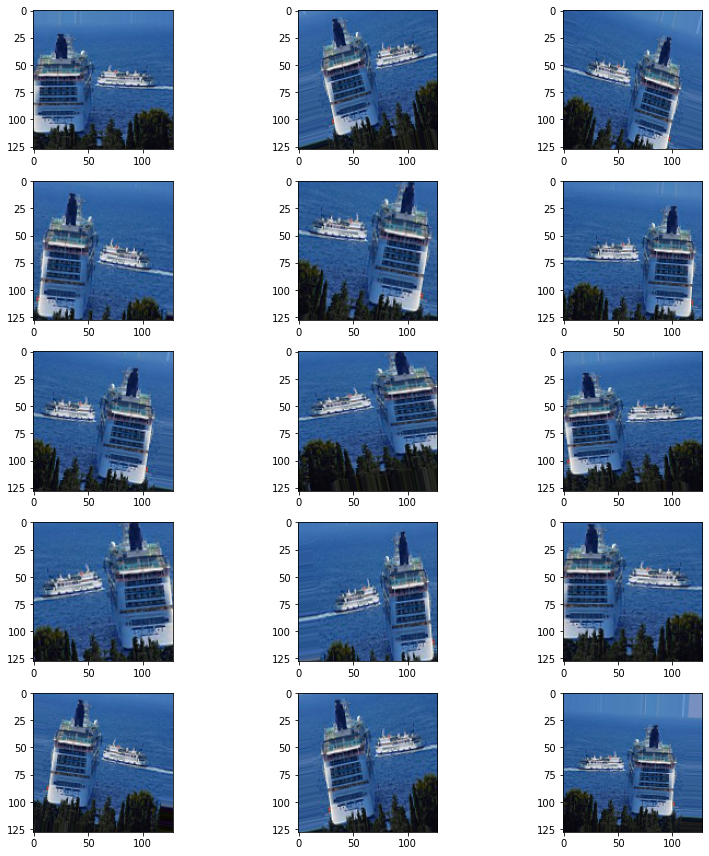

In [29]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

## Fit Model

In [30]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    #validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
333/333 [==============================] - 242s 727ms/step - loss: 1.8758 - accuracy: 0.3777
Epoch 2/50
333/333 [==============================] - 241s 725ms/step - loss: 1.4217 - accuracy: 0.4637
Epoch 3/50
333/333 [==============================] - 241s 724ms/step - loss: 1.1779 - accuracy: 0.5407
Epoch 4/50
333/333 [==============================] - 245s 735ms/step - loss: 1.1175 - accuracy: 0.5586
Epoch 5/50
333/333 [==============================] - 243s 729ms/step - loss: 0.9933 - accuracy: 0.6077
Epoch 6/50
333/333 [==============================] - 242s 728ms/step - loss: 0.9494 - accuracy: 0.6173
Epoch 7/50
333/333 [==============================] - 241s 725ms/step - loss: 0.8820 - accuracy: 0.6604
Epoch 8/50
333/333 [==============================] - 241s 723ms/step - loss: 0.8758 - accuracy: 0.6580
Epoch 9/50
333/333 [==============================] - 240s 722ms/step - loss: 0.8266 - accur

save model

In [31]:
model.save_weights("model.h5")

Virtualize Training

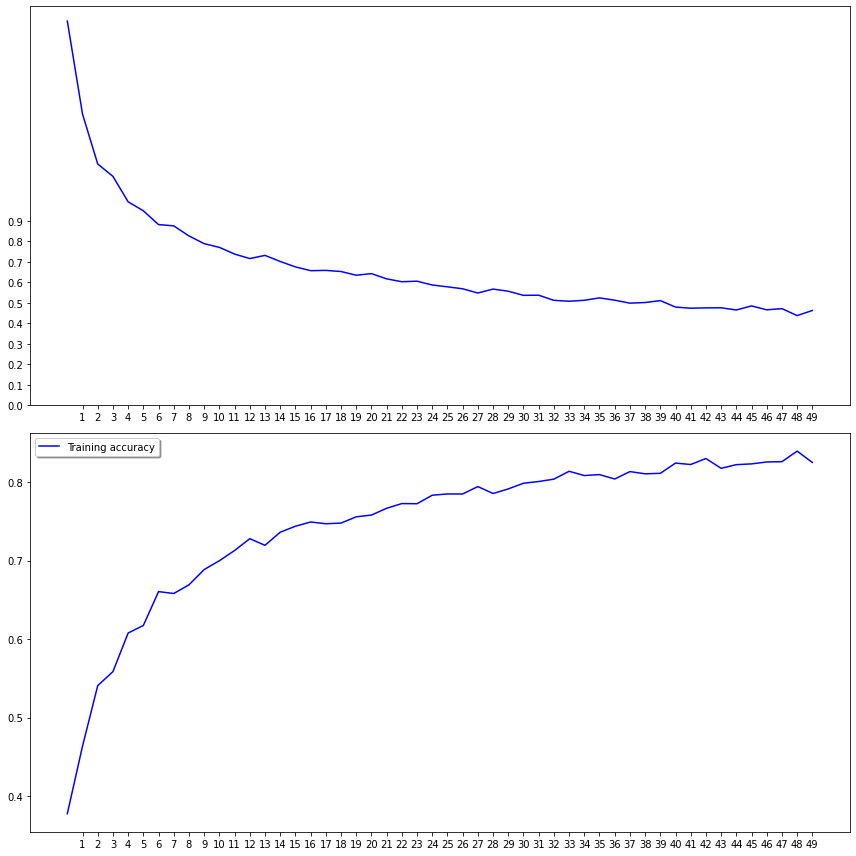

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
#ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
#ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [34]:
#Create Testing Generator

In [35]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/tmp/images/", 
    x_col='image',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 2680 validated image filenames.


In [36]:
nb_samples = test_df.shape[0]
nb_samples

2680

## Predict

In [37]:
test_generator.reset()
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

Instructions for updating:
Please use Model.predict, which supports generators.


In [38]:
predicted_class_indices=np.argmax(predict,axis=1)
predicted_class_indices

array([3, 3, 3, ..., 3, 0, 2])

In [39]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames=test_df.image
results=pd.DataFrame({"image":filenames,
                      "category":predictions})
results.to_csv("results2.csv",index=False)